# Estudi de dades de OpenMP

A tindre a en compte
- Es necesari tindre les llibreries matplotlib i pandas per executar aquest document
- Els fitxers csv son del format, columna es tamany de matriu, i les files donen els temps
- Els comentaris fan referencia a les dades extretes amb el meu ordinador. Els temps d'execucio podrian variar molt si s'executes en un altre.

In [111]:
# Llibrerias necesaries
import pandas as pd
import matplotlib.pyplot as plt

## Suma de matrius

### Sequencial

Resultat

In [112]:
dfss = pd.read_csv('csv/sumaSequencial.csv')
dfss

,100x100,200x200,400x400,800x800,1000x1000,2000x2000,3000x3000,
0,0.000042,0.000208,0.000794,0.002781,0.065188,0.175389,0.236412,
1,0.000054,0.000203,0.004667,0.002829,0.003957,0.235749,0.194551,
2,0.000044,0.000180,0.000830,0.003119,0.004333,0.207603,0.310130,
3,0.000055,0.000249,0.000907,0.003491,0.046185,0.261451,0.239860,
4,0.000053,0.000192,0.008395,0.002794,0.048924,0.237168,0.298368,
5,0.000051,0.000231,0.002578,0.050513,0.216342,0.287184,0.380312,
6,0.000066,0.000246,0.000878,0.003611,0.030386,0.122238,0.301038,
7,0.000053,0.006057,0.001184,0.003368,0.050717,0.214770,0.219801,
8,0.000042,0.000192,0.000759,0.002812,0.075552,0.179119,0.234038,
9,0.000055,0.000189,0.000762,0.002548,0.009533,0.204120,0.248905,


A partir de ara no mostrare els csv pero si mostrare les seves grafiques.

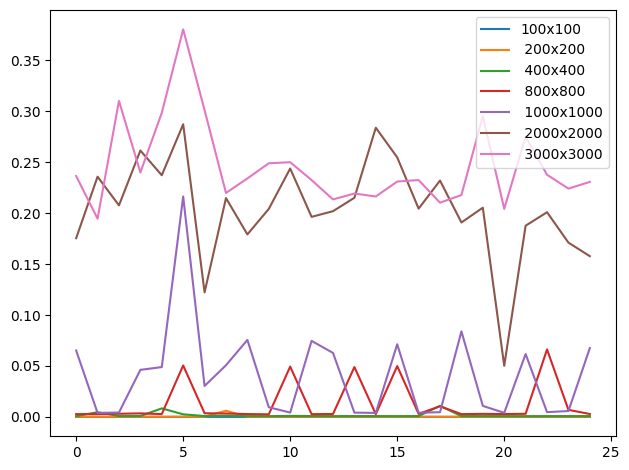

In [113]:
dfss.plot();

#### Mitjanes

<Axes: >

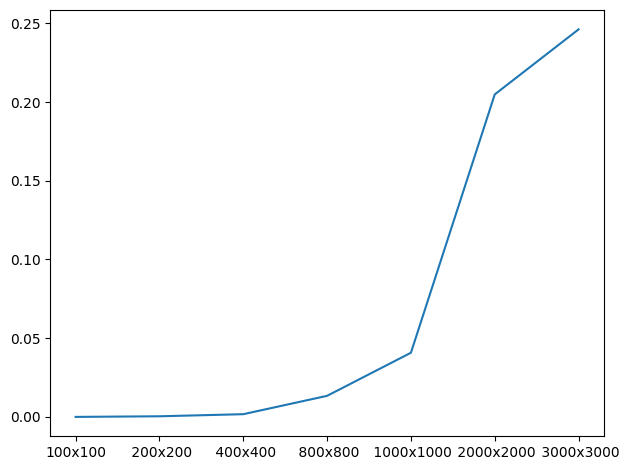

In [114]:
dfss.mean(numeric_only=True).plot()

Es pot veure com el temps de execucio augmenta rapidament.

### Paralelisme 1
Ara ho comparare amb una primera utilitzacio de paralelisme.

<Axes: >

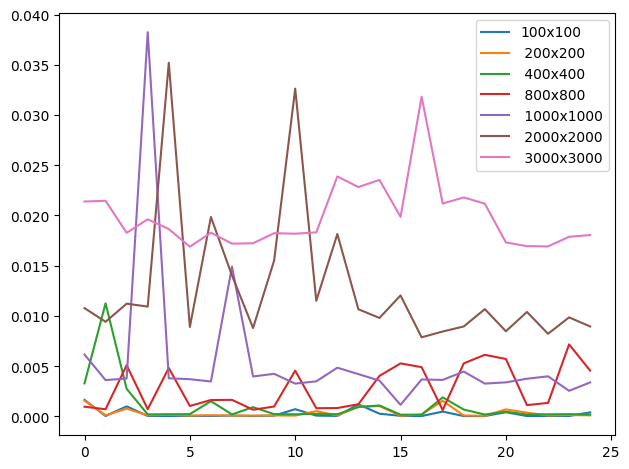

In [115]:
# Data frame suma paralel
dfsp = pd.read_csv('csv/sumaParalel.csv')
dfsp.plot()

Com es pot veure en las execucions de 10000x10000 el temps pot variar molt, aixo demostra el perque els calculs es fan a partir de la mitjana.

#### Comparant les mitjanes amb la suma sequencial

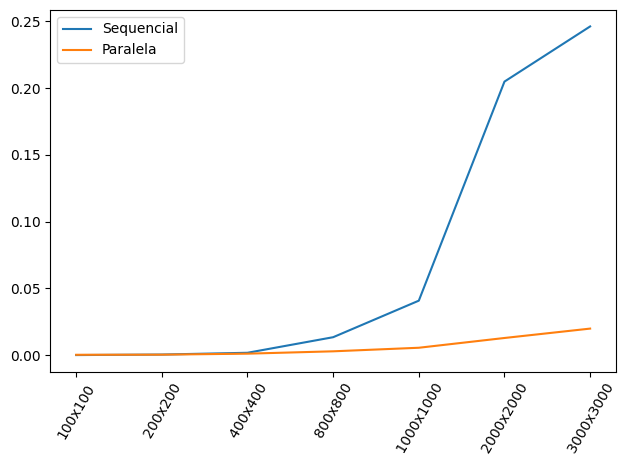

In [116]:
ax=dfss.mean(numeric_only=True).plot(label='Sequencial')
dfsp.mean(numeric_only=True).plot(ax=ax, label='Paralela')
plt.xticks(rotation=60)
plt.legend()
plt.show()